# Lab assignment: dogs VS cats

<table><tr>
    <td><img src="img/doge.jpg" style="width:400px;height:400px;"></td>
    <td><img src="img/cat.jpg" style="width:400px;height:400px;"></td>
</tr></table>

In this assignment we will face an image classification problem, trying to tell apart images of dogs and images of cats. The final battle begins! And to do so we will use a Deep Learning approach.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</font>

***

<img src="img/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.
</font>

***

<img src="img/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
This is an advanced exercise that can help you gain a deeper knowledge into the topic. Good luck!</font>

***

To avoid missing packages and compatibility issues you should run this notebook under one of the [recommended Deep Learning environment files](https://github.com/albarji/teaching-environments/tree/master/deeplearning), or make use of [Google Colaboratory](https://colab.research.google.com/). If you use Colaboratory make sure to [activate GPU support](https://colab.research.google.com/notebooks/gpu.ipynb).

The following code will embed any plots into the notebook instead of generating a new window:

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
from skimage.transform import resize

import numpy as np
import pandas as pd
import glob
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV

In [4]:
%tensorflow_version 1.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## Data processing

The images to use in this assignment are available [here](https://drive.google.com/open?id=105jGDrjEgxx2W2gYhFF8Mbf1J9qJeDPm) as a zip file. Download the data package and extract it into a folder in your computer. It is recommended to run this section of the notebook in your machine, as you might find memory issues when working in Google Colaboratory. Later on we will see how to load the processed data into Colab.

Data is structured under two folders, *train* and *test*. You are only allowed to use the *test* data to measure the performance of your model **after** you have finished training. Both *train* and *test* folders contain one subfolder per class (*cats* and *dogs*).

The recommended way to load an image from disk is to use the *imread* function from the *scikit-image* library. For example:

In [0]:
image = imread("./img/sample.jpg")

This returns the image as 3-dimensional numpy matrix, containing the value of intensity of every pixel in each row, column and color channel.

In [0]:
image.shape

(499, 367, 3)

We can visualize the loaded image using

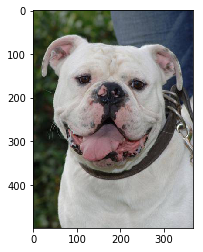

In [0]:
plt.imshow(image)

The dataset includes 20000 training images and 5000 test images, each image at a different resolution. Loading all this data at once requires too much memory, so we will need to **resize** each image to a smaller, common size as we load them from disk. We can do so by again making use of a *scikit-image* function. For example:

C:\Users\Luis\Anaconda3\envs\deeplearning-labs\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


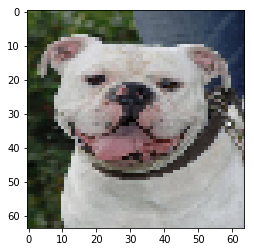

In [0]:
size = 64
smallimage = resize(image, (64, 64, 3), mode="reflect")  # 64 x 64 pixels, 3 color channels
plt.imshow(smallimage)

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    
Perform the following tasks to prepare the data:
- Build a numpy array *X_train* containing one entry for each training image in the data. Each entry must contain the 3-dimensional matrix of pixels corresponding to an image. Make sure to scale down each image to a common size
- Normalize *X_train* so that pixels follow a distribution lying in the range [0, 1]
- Build a corresponding array *Y_train* with the class of each training image (0 for cats and 1 for dogs).
- Randomly shuffle the data. Make sure you shuffle both *X_train* and *Y_train* using the same permutation, so you don't lose track of the class of each training pattern.

- Repeat the whole procedure again to generate *X_test* and *Y_test* matrices for the test data.
</font>

***

<img src="img/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
- Take advantage of the *glob* package to generate the filename lists for the indoor and outdoor subfolders.
- Since you need to repeat the procedure both for training and test data, it would be useful to implement a function that performs all the data loading and transforming steps.

</font>

***

In [0]:
def carga_imagenes(ruta):
    archivos=glob.glob(ruta + '/*jpg')
    
    """Categorizamos por perro y gato"""
    categoria=[]
    for i in archivos:
        if i.split("\\")[1].split(".")[0]=="dog":
            categoria.append(1)
        else:
            categoria.append(0)
            
    """Redimensionamos las imágenes"""
    fotos=[]
    for j in archivos:
        foto=imread(j)
        smallimage=resize(foto, (64,64,3), mode="reflect")
        fotos.append(smallimage)
        
    """Creamos X e Y"""
    X=np.array(fotos).reshape(-1,64,64,3)
    Y=categoria
    
    """Barajamos los datos"""
    X,Y=shuffle(X,Y)
    
    return X,Y

In [0]:
ruta_train='C:/Users/Luis/Machine Learning Python/Algoritmos Avanzados/Redes Neuronales/Alba/practice_catsVSdogs/dog_cat_train'
ruta_test='C:/Users/Luis/Machine Learning Python/Algoritmos Avanzados/Redes Neuronales/Alba/practice_catsVSdogs/dog_cat_test'

In [0]:
X_train, Y_train=carga_imagenes(ruta_train)

In [0]:
X_test, Y_test=carga_imagenes(ruta_test)

If everything has been properly loaded both X_train and Y_train lists should have equal length, and the same should happen for the pair X_test and Y_test.

In [0]:
print("X_train size", len(X_train))
print("Y_train size", len(Y_train))
print("X_test size", len(X_test))
print("Y_test size", len(Y_test))

X_train size 20000
Y_train size 20000
X_test size 5000
Y_test size 5000


### Creating a backup of the processed data

Since the data processing above can be slow, we can save time in future sessions by saving the `X_train, Y_train, X_test, Y_test` variables we created above in a numpy format. To do so, run

In [0]:
datafile = "/content/drive/My Drive/Colab Notebooks/data.npz"  # The same file you used to save the data"  # Change here the location for the processed data

In [0]:
np.savez(datafile, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test)

NameError: ignored

### Loading processed data from the backup

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Upon restarting this notebook you can load the preprocessed data by running

In [0]:
datafile = "/content/drive/My Drive/Colab Notebooks/data.npz"  # The same file you used to save the data

In [0]:
data = np.load(datafile)

In [0]:
X_train = data['X_train']
X_test = data['X_test']
Y_train = data['Y_train']
Y_test = data['Y_test']

#### Note on loading data into Google Colab

To load data into a Google Colaboratory you will need to upload the processed data file into your Google Drive account. After that, in the Colab notebook you can run 

```
from google.colab import drive
drive.mount('/content/drive')
```

to connect all the contents in your Google Drive to the folder `/content/drive`. Then you should be able to run the loading cells above to get the data. For example, if you uploaded the data file directly to the home folder in Google Drive, you should be able to access it using the path `/content/drive/My Drive/data.npz`.

## Basic deep model

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***
<font color=#ad3e26>
Create a deep network that achieves at least a 70% of accuracy in the test set. Make use of the layers you seem fit for problem, but you should include at least one layer that makes use of the spatial properties of the images. You cannot use the test data for fitting the network, but you can use it to check the final performance of different network architectures, and select the architecture performing best.</font>

***

<img src="img/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
If you are unable to attain the required 70% of accuracy, or your accuracy is too close to 100%, review the following checklist:
- Have you mixed training and test data?
- Have the values of the pixels been normalized?
- Have you compiled the model with a loss function appropriate for **binary** classification?
- Have you used ReLU units in the hidden layers? Have you used sigmoid or softmax layers in the output layer?

***

In [86]:
model_conv_0 = Sequential()
model_conv_0.add(Conv2D (filters=40, kernel_size=(4,4), padding='valid', input_shape=(64, 64, 3)))
model_conv_0.add(Activation('relu'))
model_conv_0.add(Flatten())
model_conv_0.add(Dense(1))
model_conv_0.add(Activation('sigmoid'))
model_conv_0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv_0.fit(X_train,
          Y_train,
          batch_size=80,
          epochs=30,
          verbose=2)

Epoch 1/30
 - 5s - loss: 0.6958 - acc: 0.6085
Epoch 2/30
 - 3s - loss: 0.5742 - acc: 0.7043
Epoch 3/30
 - 3s - loss: 0.5100 - acc: 0.7522
Epoch 4/30
 - 3s - loss: 0.4569 - acc: 0.7876
Epoch 5/30
 - 3s - loss: 0.4066 - acc: 0.8182
Epoch 6/30
 - 3s - loss: 0.3609 - acc: 0.8446
Epoch 7/30
 - 3s - loss: 0.3201 - acc: 0.8697
Epoch 8/30
 - 3s - loss: 0.2880 - acc: 0.8844
Epoch 9/30
 - 3s - loss: 0.2491 - acc: 0.9055
Epoch 10/30
 - 3s - loss: 0.2253 - acc: 0.9176
Epoch 11/30
 - 3s - loss: 0.1993 - acc: 0.9315
Epoch 12/30
 - 3s - loss: 0.1717 - acc: 0.9459
Epoch 13/30
 - 3s - loss: 0.1481 - acc: 0.9564
Epoch 14/30
 - 3s - loss: 0.1300 - acc: 0.9646
Epoch 15/30
 - 3s - loss: 0.1116 - acc: 0.9726
Epoch 16/30
 - 3s - loss: 0.0960 - acc: 0.9805
Epoch 17/30
 - 3s - loss: 0.0828 - acc: 0.9843
Epoch 18/30
 - 3s - loss: 0.0707 - acc: 0.9886
Epoch 19/30
 - 3s - loss: 0.0617 - acc: 0.9920
Epoch 20/30
 - 3s - loss: 0.0517 - acc: 0.9946
Epoch 21/30
 - 4s - loss: 0.0445 - acc: 0.9956
Epoch 22/30
 - 4s - lo

In [87]:
score_test_0 = model_conv_0.evaluate(X_test, Y_test)
print("Test loss", score_test_0[0])
print("Test accuracy", score_test_0[1])

5000/5000 [==============================] - 1s 271us/step
Test loss 1.2585531171798705
Test accuracy 0.7234


In [88]:
score_train_0 = model_conv_0.evaluate(X_train, Y_train)
print("Train loss", score_train_0[0])
print("Train accuracy", score_train_0[1])

20000/20000 [==============================] - 3s 140us/step
Train loss 0.006488931073993444
Train accuracy 1.0


In [89]:
model_conv_1 = Sequential()
model_conv_1.add(Conv2D (filters=40, kernel_size=(4,4), padding='valid', input_shape=(64, 64, 3)))
model_conv_1.add(Activation('relu'))
model_conv_1.add(Flatten())
model_conv_1.add(Dropout(0.4))
model_conv_1.add(Dense(1))
model_conv_1.add(Activation('sigmoid'))
model_conv_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv_1.fit(X_train,
          Y_train,
          batch_size=80,
          epochs=15,
          verbose=2)

Epoch 1/15
 - 7s - loss: 0.6851 - acc: 0.6179
Epoch 2/15
 - 5s - loss: 0.5864 - acc: 0.6906
Epoch 3/15
 - 5s - loss: 0.5398 - acc: 0.7296
Epoch 4/15
 - 5s - loss: 0.5056 - acc: 0.7539
Epoch 5/15
 - 5s - loss: 0.4667 - acc: 0.7794
Epoch 6/15
 - 5s - loss: 0.4482 - acc: 0.7895
Epoch 7/15
 - 5s - loss: 0.4272 - acc: 0.8030
Epoch 8/15
 - 5s - loss: 0.3977 - acc: 0.8210
Epoch 9/15
 - 5s - loss: 0.3697 - acc: 0.8353
Epoch 10/15
 - 5s - loss: 0.3435 - acc: 0.8543
Epoch 11/15
 - 5s - loss: 0.3225 - acc: 0.8616
Epoch 12/15
 - 5s - loss: 0.2990 - acc: 0.8758
Epoch 13/15
 - 5s - loss: 0.2776 - acc: 0.8834
Epoch 14/15
 - 5s - loss: 0.2637 - acc: 0.8920
Epoch 15/15
 - 5s - loss: 0.2418 - acc: 0.9037


In [90]:
score_test_1 = model_conv_1.evaluate(X_test, Y_test)
print("Test loss", score_test_1[0])
print("Test accuracy", score_test_1[1])

5000/5000 [==============================] - 1s 278us/step
Test loss 0.6358783464431763
Test accuracy 0.7334


In [91]:
score_train_1 = model_conv_1.evaluate(X_train, Y_train)
print("Train loss", score_train_1[0])
print("Train accuracy", score_train_1[1])

20000/20000 [==============================] - 3s 138us/step
Train loss 0.17492043137550353
Train accuracy 0.9524


In [93]:
model_conv_2 = Sequential()
model_conv_2.add(Conv2D (filters=40, kernel_size=(4,4), padding='valid', input_shape=(64, 64, 3)))
model_conv_2.add(MaxPooling2D(pool_size=(3,3)))
model_conv_2.add(Activation('relu'))
model_conv_2.add(Flatten())
model_conv_1.add(Dropout(0.4))
model_conv_2.add(Dense(1))
model_conv_2.add(Activation('sigmoid'))
model_conv_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv_2.fit(X_train,
          Y_train,
          batch_size=80,
          epochs=15,
          verbose=2)

Epoch 1/15
 - 5s - loss: 0.6165 - acc: 0.6524
Epoch 2/15
 - 3s - loss: 0.5283 - acc: 0.7398
Epoch 3/15
 - 3s - loss: 0.4945 - acc: 0.7648
Epoch 4/15
 - 3s - loss: 0.4772 - acc: 0.7728
Epoch 5/15
 - 3s - loss: 0.4578 - acc: 0.7872
Epoch 6/15
 - 3s - loss: 0.4536 - acc: 0.7910
Epoch 7/15
 - 3s - loss: 0.4357 - acc: 0.7996
Epoch 8/15
 - 3s - loss: 0.4286 - acc: 0.8039
Epoch 9/15
 - 3s - loss: 0.4152 - acc: 0.8121
Epoch 10/15
 - 3s - loss: 0.4075 - acc: 0.8168
Epoch 11/15
 - 3s - loss: 0.3972 - acc: 0.8204
Epoch 12/15
 - 3s - loss: 0.3871 - acc: 0.8277
Epoch 13/15
 - 3s - loss: 0.3826 - acc: 0.8284
Epoch 14/15
 - 3s - loss: 0.3703 - acc: 0.8371
Epoch 15/15
 - 3s - loss: 0.3653 - acc: 0.8399


In [94]:
score_test_2= model_conv_2.evaluate(X_test, Y_test)
print("Test loss", score_test_2[0])
print("Test accuracy", score_test_2[1])

5000/5000 [==============================] - 1s 269us/step
Test loss 0.47589314002990724
Test accuracy 0.7836


In [95]:
score_train_2= model_conv_2.evaluate(X_train, Y_train)
print("Train loss", score_train_2[0])
print("Train accuracy", score_train_2[1])

20000/20000 [==============================] - 2s 118us/step
Train loss 0.334742221736908
Train accuracy 0.85815


In [124]:
model_conv_2_1 = Sequential()
model_conv_2_1.add(Conv2D (filters=40, kernel_size=(4,4), padding='valid', input_shape=(64, 64, 3)))
model_conv_2_1.add(MaxPooling2D(pool_size=(3,3)))
model_conv_2_1.add(Activation('relu'))
model_conv_2_1.add(Flatten())
model_conv_2_1.add(Dropout(0.4))
model_conv_2_1.add(Dense(1))
model_conv_2_1.add(Activation('sigmoid'))
model_conv_2_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv_2_1.fit(X_train,
          Y_train,
          batch_size=40,
          epochs=50,
          verbose=2)

Epoch 1/50
 - 6s - loss: 0.6195 - acc: 0.6506
Epoch 2/50
 - 4s - loss: 0.5340 - acc: 0.7338
Epoch 3/50
 - 4s - loss: 0.5088 - acc: 0.7520
Epoch 4/50
 - 4s - loss: 0.4883 - acc: 0.7646
Epoch 5/50
 - 4s - loss: 0.4765 - acc: 0.7745
Epoch 6/50
 - 4s - loss: 0.4643 - acc: 0.7772
Epoch 7/50
 - 4s - loss: 0.4567 - acc: 0.7874
Epoch 8/50
 - 4s - loss: 0.4470 - acc: 0.7931
Epoch 9/50
 - 4s - loss: 0.4376 - acc: 0.7970
Epoch 10/50
 - 4s - loss: 0.4298 - acc: 0.8008
Epoch 11/50
 - 4s - loss: 0.4249 - acc: 0.8057
Epoch 12/50
 - 4s - loss: 0.4171 - acc: 0.8098
Epoch 13/50
 - 4s - loss: 0.4128 - acc: 0.8143
Epoch 14/50
 - 4s - loss: 0.4092 - acc: 0.8143
Epoch 15/50
 - 4s - loss: 0.4036 - acc: 0.8174
Epoch 16/50
 - 4s - loss: 0.3978 - acc: 0.8206
Epoch 17/50
 - 4s - loss: 0.3916 - acc: 0.8230
Epoch 18/50
 - 4s - loss: 0.3949 - acc: 0.8197
Epoch 19/50
 - 4s - loss: 0.3876 - acc: 0.8270
Epoch 20/50
 - 4s - loss: 0.3890 - acc: 0.8298
Epoch 21/50
 - 4s - loss: 0.3796 - acc: 0.8306
Epoch 22/50
 - 4s - lo

In [125]:
score_test_2_1= model_conv_2_1.evaluate(X_test, Y_test)
print("Test loss", score_test_2_1[0])
print("Test accuracy", score_test_2_1[1])

5000/5000 [==============================] - 2s 323us/step
Test loss 0.508703568816185
Test accuracy 0.788


In [126]:
score_train_2_1= model_conv_2_1.evaluate(X_train, Y_train)
print("Train loss", score_train_2_1[0])
print("Train accuracy", score_train_2_1[1])

20000/20000 [==============================] - 3s 126us/step
Train loss 0.23330094754695893
Train accuracy 0.911


In [121]:
model_conv_2_2 = Sequential()
model_conv_2_2.add(Conv2D (filters=40, kernel_size=(4,4), padding='valid', input_shape=(64, 64, 3)))
model_conv_2_2.add(MaxPooling2D(pool_size=(3,3)))
model_conv_2_2.add(Activation('relu'))
model_conv_2_2.add(Flatten())
model_conv_2_2.add(Dropout(0.4))
model_conv_2_2.add(Dense(1))
model_conv_2_2.add(Activation('sigmoid'))
model_conv_2_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv_2_2.fit(X_train,
          Y_train,
          batch_size=500,
          epochs=50,
          verbose=2)

Epoch 1/50
 - 5s - loss: 0.6999 - acc: 0.5426
Epoch 2/50
 - 3s - loss: 0.6371 - acc: 0.6478
Epoch 3/50
 - 3s - loss: 0.5951 - acc: 0.6834
Epoch 4/50
 - 3s - loss: 0.5661 - acc: 0.7141
Epoch 5/50
 - 3s - loss: 0.5488 - acc: 0.7231
Epoch 6/50
 - 3s - loss: 0.5396 - acc: 0.7345
Epoch 7/50
 - 3s - loss: 0.5196 - acc: 0.7469
Epoch 8/50
 - 3s - loss: 0.5080 - acc: 0.7559
Epoch 9/50
 - 3s - loss: 0.5002 - acc: 0.7590
Epoch 10/50
 - 3s - loss: 0.4912 - acc: 0.7667
Epoch 11/50
 - 3s - loss: 0.4848 - acc: 0.7699
Epoch 12/50
 - 3s - loss: 0.4783 - acc: 0.7732
Epoch 13/50
 - 3s - loss: 0.4748 - acc: 0.7769
Epoch 14/50
 - 3s - loss: 0.4710 - acc: 0.7775
Epoch 15/50
 - 3s - loss: 0.4631 - acc: 0.7848
Epoch 16/50
 - 3s - loss: 0.4593 - acc: 0.7864
Epoch 17/50
 - 3s - loss: 0.4564 - acc: 0.7870
Epoch 18/50
 - 3s - loss: 0.4541 - acc: 0.7857
Epoch 19/50
 - 3s - loss: 0.4513 - acc: 0.7886
Epoch 20/50
 - 3s - loss: 0.4574 - acc: 0.7850
Epoch 21/50
 - 3s - loss: 0.4455 - acc: 0.7925
Epoch 22/50
 - 3s - lo

In [122]:
score_test_2_2= model_conv_2_2.evaluate(X_test, Y_test)
print("Test loss", score_test_2_2[0])
print("Test accuracy", score_test_2_2[1])

5000/5000 [==============================] - 2s 322us/step
Test loss 0.4571601342201233
Test accuracy 0.7878


In [123]:
score_train_2_2= model_conv_2_2.evaluate(X_train, Y_train)
print("Train loss", score_train_2_2[0])
print("Train accuracy", score_train_2_2[1])

20000/20000 [==============================] - 2s 123us/step
Train loss 0.36385174827575684
Train accuracy 0.84335


No hemos conseguido mejorar en exceso el accuracy, aún así, el mejor modelo es model_conv_2_1.

## Improving the network

<img src="img/pro.png" height="80" width="80" style="float: right;"/>

***

<font color=#259b4c>
    
You can further improve your results by applying one or more of the following strategies:
- Keep apart a portion of the training data as a **validation set**. Then use an <a href="https://keras.io/callbacks/#earlystopping">**EarlyStopping strategy**</a> to monitor the loss of these validation data, and stop when training when after a number of iterations such loss has not decreased.
- Use **image augmentation techniques** to artifically create new training images. To do so, you can make use of <a href="https://keras.io/preprocessing/image/">ImageDataGenerator</a> in Keras.
- Make use of a pre-trained large network, building your network on top of it. You can find some examples in the [Keras Applications](https://keras.io/applications/) page. Be careful when freezing pre-trained networks that include [BatchNormalization layers](http://blog.datumbox.com/the-batch-normalization-layer-of-keras-is-broken/), such as ResNet.
- Make use of **metamodelling techniques** to select the best architecture parameters for the networks. You can use scikit-learn methods GridSearchCV or RandomSearchCV. You can do those by using the <a href="https://keras.io/scikit-learn-api/">KerasClassifier</a> wrapper. Even better, you can mix KerasClassifier with an advanced search method such as [BayesSearch](https://scikit-optimize.github.io/#skopt.BayesSearchCV), included in the [scikit-optimize](https://scikit-optimize.github.io/) library. If you get memory problems try to free GPU memory before building each network by [clearing the tensorflow session](https://stackoverflow.com/questions/50895110/what-do-i-need-k-clear-session-and-del-model-for-keras-with-tensorflow-gpu).

If you correctly use these techniques you should be able to improve your model. With some effort it is possible to up to a 90% test accuracy. Try to do your best!</font>

***

Vamos a probar separando de nuestro conjunto de train una pequeña parte para hacer validación. Usaremos el mejor modelo conseguido anteriormente, para tratar de mejorar los resultados.
El reparto final es: 80% (85% train y 15% validación) y 20% test.

In [135]:
es = EarlyStopping(monitor='loss', mode='auto', verbose=1)
model_conv_3_val = Sequential()
model_conv_3_val.add(Conv2D (filters=40, kernel_size=(5,5), padding='valid', input_shape=(64, 64, 3)))
model_conv_3_val.add(MaxPooling2D(pool_size=(3,3)))
model_conv_3_val.add(Activation('relu'))
model_conv_3_val.add(Flatten())
model_conv_3_val.add(Dropout(0.4))
model_conv_3_val.add(Dense(1))
model_conv_3_val.add(Activation('sigmoid'))
model_conv_3_val.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv_3_val.fit(X_train,    
                 Y_train,
                 batch_size=40,
                 epochs=100,
                 validation_split=0.15,
                 validation_freq=3,
                 verbose=2,
                 callbacks=[es])

Train on 17000 samples, validate on 3000 samples
Epoch 1/100
 - 6s - loss: 0.6377 - acc: 0.6347
Epoch 2/100
 - 3s - loss: 0.5684 - acc: 0.7078
Epoch 3/100
 - 4s - loss: 0.5395 - acc: 0.7300 - val_loss: 0.5398 - val_acc: 0.7373
Epoch 4/100
 - 3s - loss: 0.5203 - acc: 0.7448
Epoch 5/100
 - 3s - loss: 0.5015 - acc: 0.7578
Epoch 6/100
 - 4s - loss: 0.4809 - acc: 0.7682 - val_loss: 0.5239 - val_acc: 0.7443
Epoch 7/100
 - 3s - loss: 0.4731 - acc: 0.7706
Epoch 8/100
 - 3s - loss: 0.4702 - acc: 0.7812
Epoch 9/100
 - 4s - loss: 0.4563 - acc: 0.7855 - val_loss: 0.5012 - val_acc: 0.7593
Epoch 10/100
 - 3s - loss: 0.4490 - acc: 0.7909
Epoch 11/100
 - 3s - loss: 0.4429 - acc: 0.7926
Epoch 12/100
 - 4s - loss: 0.4373 - acc: 0.7958 - val_loss: 0.5038 - val_acc: 0.7633
Epoch 13/100
 - 3s - loss: 0.4322 - acc: 0.7985
Epoch 14/100
 - 3s - loss: 0.4268 - acc: 0.8010
Epoch 15/100
 - 4s - loss: 0.4104 - acc: 0.8092 - val_loss: 0.5021 - val_acc: 0.7663
Epoch 16/100
 - 3s - loss: 0.4081 - acc: 0.8146
Epoch 1

In [136]:
score_test_3_val = model_conv_3_val.evaluate(X_test, Y_test)
print("Test loss", score_test_3_val[0])
print("Test accuracy", score_test_3_val[1])

5000/5000 [==============================] - 1s 132us/step
Test loss 0.5182939202308655
Test accuracy 0.765


In [137]:
score_train_1_1_val = model_conv_3_val.evaluate(X_train, Y_train)
print("Train loss", score_train_1_1_val[0])
print("Train accuracy", score_train_1_1_val[1])

20000/20000 [==============================] - 3s 128us/step
Train loss 0.398446884727478
Train accuracy 0.8232


Hemos obtenido peor resultado, por lo que vamos a crear un nuevo modelo más complejo, tratando de mejorar los resultados.

In [138]:
es = EarlyStopping(monitor='loss', mode='auto', verbose=1)
model_conv_4_val = Sequential()
model_conv_4_val.add(Conv2D (filters=40, kernel_size=(2,2), padding='valid', input_shape=(64, 64, 3)))
model_conv_4_val.add(MaxPooling2D(pool_size=(2, 2)))
model_conv_4_val.add(Activation('relu'))
model_conv_4_val.add(Dense(10))
model_conv_4_val.add(Activation('relu'))
model_conv_4_val.add(Conv2D (filters=30, kernel_size=(3,3), padding='valid', input_shape=(64, 64, 3)))
model_conv_4_val.add(MaxPooling2D(pool_size=(2, 2)))
model_conv_4_val.add(Activation('relu'))
model_conv_4_val.add(Dense(5))
model_conv_4_val.add(Activation('relu'))
model_conv_4_val.add(Conv2D (filters=60, kernel_size=(2,2), padding='valid', input_shape=(64, 64, 3)))
model_conv_4_val.add(MaxPooling2D(pool_size=(2, 2)))
model_conv_4_val.add(Activation('relu'))
model_conv_4_val.add(Flatten())
model_conv_4_val.add(Dense(1))
model_conv_4_val.add(Activation('sigmoid'))
model_conv_4_val.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
model_conv_4_val.fit(X_train,
                     Y_train,
                     batch_size=40,
                     epochs=100,
                     validation_split=0.15,
                     validation_freq=3,
                     verbose=2,
                     callbacks=[es])

Train on 17000 samples, validate on 3000 samples
Epoch 1/100
 - 7s - loss: 0.6927 - acc: 0.5067
Epoch 2/100
 - 4s - loss: 0.6915 - acc: 0.5480
Epoch 3/100
 - 5s - loss: 0.6899 - acc: 0.5599 - val_loss: 0.6879 - val_acc: 0.5723
Epoch 4/100
 - 4s - loss: 0.6877 - acc: 0.5671
Epoch 5/100
 - 4s - loss: 0.6850 - acc: 0.5788
Epoch 6/100
 - 4s - loss: 0.6811 - acc: 0.5797 - val_loss: 0.6769 - val_acc: 0.6040
Epoch 7/100
 - 4s - loss: 0.6760 - acc: 0.5862
Epoch 8/100
 - 4s - loss: 0.6689 - acc: 0.5986
Epoch 9/100
 - 4s - loss: 0.6607 - acc: 0.6054 - val_loss: 0.6536 - val_acc: 0.6107
Epoch 10/100
 - 4s - loss: 0.6517 - acc: 0.6204
Epoch 11/100
 - 4s - loss: 0.6421 - acc: 0.6305
Epoch 12/100
 - 4s - loss: 0.6363 - acc: 0.6391 - val_loss: 0.6713 - val_acc: 0.5813
Epoch 13/100
 - 4s - loss: 0.6293 - acc: 0.6456
Epoch 14/100
 - 4s - loss: 0.6254 - acc: 0.6508
Epoch 15/100
 - 4s - loss: 0.6195 - acc: 0.6591 - val_loss: 0.6231 - val_acc: 0.6540
Epoch 16/100
 - 4s - loss: 0.6130 - acc: 0.6649
Epoch 1

In [139]:
score_test_4_val = model_conv_4_val.evaluate(X_test, Y_test)
print("Test loss", score_test_4_val[0])
print("Test accuracy", score_test_4_val[1])

5000/5000 [==============================] - 1s 147us/step
Test loss 0.4776692738056183
Test accuracy 0.7752


In [140]:
score_train_4_val = model_conv_4_val.evaluate(X_train, Y_train)
print("Train loss", score_train_4_val[0])
print("Train accuracy", score_train_4_val[1])

20000/20000 [==============================] - 3s 142us/step
Train loss 0.39295620024204253
Train accuracy 0.8203


No he conseguido mejorar notablemente el modelo, por lo que, sería conveniente quedarse con el mejor modelo de la primera parte, ya que ese modelo es menos complejo.

## Analyzing the results

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Find and show some test images for which your model fails. Can you give an explanation for this behavior?</font>

***

In [186]:
y_preds_model_conv= model_conv_2_1.predict_classes(X_test)
y_preds_model_conv=y_preds_model_conv.reshape(5000)
df_errores= pd.DataFrame({"valor_real":Y_test,"valor_pred":y_preds_model_conv})
df_errores

,valor_real,valor_pred
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
4995,1,1
4996,1,1
4997,1,0
4998,1,1


Vemos que para la posición [1], el modelo comete un error e. Vamos a ver la imagen.

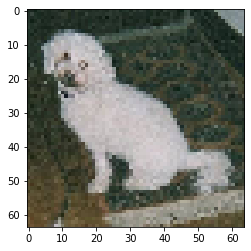

In [209]:
(fails,) = np.where(Y_test != y_preds_model_conv)
plt.imshow(X_test[fails[0]]);

Como podemos ver, en la imagen aparece un perro, pero nuestro modelo ha predicho gato. El pelo corto, la posición, típica de un gato, y que no se diferencie un hocico largo ha podido provocar el error.

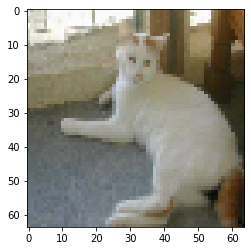

In [210]:
plt.imshow(X_test[fails[350]]);

En la imagen se observan orejas puntiagudas que han podido conllevar a error y una posición típica de perro.

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Write a small report summarizing the network choices you have tried, what worked and what didn't. What have you learned from this experience?</font>

***

Debido a que requerimos resolver un problema de clasificación binaria, nuestra red propuesta terminará con una capa densa con una sola neurona y una activación sigmoidea. Esta última neurona codificará la probabilidad de que la red esté mirando una clase u otra.  
**Los resultados varían cada vez que se ejecuta al comenzar cada vez en un punto diferente.**
  
En model_conv_0 observamos que cumplimos el objetivo del ejercicio, que es obtener un modelo cuyo accuracy en test supere 0.70, pero nuestro modelo está sobreentrenado, por lo que si incluyesemos nuevos datos, no sabríamos si podría predecir correctamente. Por ello, vamos a tratar de reducir el overfitting reduciendo el número de epochs y vamos a regulizar con una capa dropout, tratando de entrenar menos el modelo y no sufrir overfitting.

En model_conv_1 seguimos teniendo overfitting, aunque menos acusado. Vamos a incluir una capa de maxpolling para ver si conseguimos mejorar el accuracy en test.


En el model_conv_2, conseguimos reducir dráticamente el overfitting que teniamos en el primer modelo. Ya tendríamos un modelo que se ajusta a los objetivos marcados en el ejercicio consiguendo un accuracy en test mayor de 0.70. Vamos a probar reduciendo el batch_size para ver si podemos mejorarlo, aumentando también las epochs, controlando que no haya overfitting. 

En el model_conv_2_1 hemos conseguido mejorar ligeramente el accuracy en test. A continuación, realizaremos otro modelo aumentando el batch_size, por si obtuvieramos un mejor accuracy en test.

En el model_conv_2_2 no conseguimos mejorar el accuracy, por lo que **nuestro mejor modelo es el model_conv_2_1**.

En la segunda parte del ejercicio (PRO), trato de mejorar el accuracy en test con un set de validación, que sacaremos (15%) del conjunto de train. Como hemos reducido el tamaño de nuestro conjunto de train, comenzamos sin la capa dropout, además, usamos EarlyStopping para aumentar el número de epochs y que sea el propio modelo el que elija cuando parar (al ver que no mejora el accuracy y no disminuye el error), después de probar varios modelos vemos que no conseguimos mejorar el accuracy en test, incluso creando un modelo con más capas ocultas, por lo que no ha servido de nada.

He intentado realizar un conjunto de validación con GridSearch y KerasClassifier, pero no he sido capaz.

He podido comprobar la dificultad para mejorar un modelo de redes neuronales, es necesario un estudio profundo del modelo, así como de sus parámetros, y mucha experiencia para saber cómo mejorar un modelo de una manera más eficiente.



